In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error as mape
from math import sqrt

In [5]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
df1.shape

(13320, 9)

In [7]:
df1.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


# Data Cleaning : Handling null values

In [8]:
df1.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [10]:
#df1["area_type"].value_counts()
df1.groupby("area_type")["area_type"].count()

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

<AxesSubplot:xlabel='area_type', ylabel='count'>

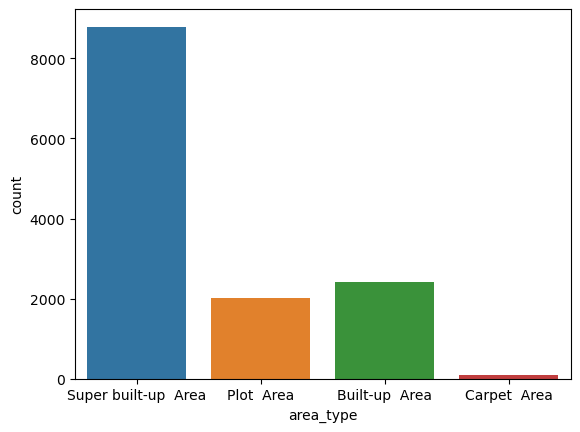

In [11]:
sns.countplot(x="area_type",data=df1)

In [12]:
df1["society"].value_counts()

GrrvaGr    80
PrarePa    76
Sryalan    59
Prtates    59
GMown E    56
           ..
Amionce     1
JaghtDe     1
Jauraht     1
Brity U     1
RSntsAp     1
Name: society, Length: 2688, dtype: int64

In [13]:
df1["balcony"].value_counts()

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

<AxesSubplot:xlabel='balcony', ylabel='count'>

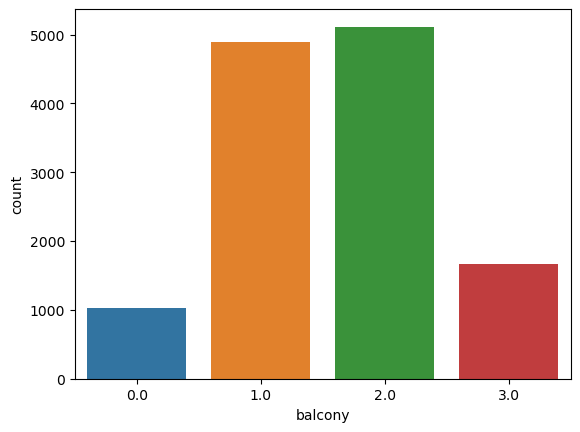

In [14]:
sns.countplot(x="balcony",data=df1)

In [15]:
df2 = df1.drop(["society","availability"],axis= 1)
df2.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [16]:
df2.isnull().sum()

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [17]:
df3 = df2.dropna()
df3.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [18]:
df3.shape

(12710, 7)

In [19]:
import warnings
warnings.filterwarnings("ignore")

#  Feature Engineering

In [20]:
df3["bhk"] = df3["size"].apply(lambda x: int(x.split(" ")[0]))
df3.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [21]:
df3["bhk"].unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13],
      dtype=int64)

In [22]:
df3[df3["bhk"]>25]

,area_type,location,size,total_sqft,bath,balcony,price,bhk
1718,Super built-up Area,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
4684,Plot Area,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


In [23]:
df3["balcony"].unique()

array([1., 3., 2., 0.])

In [24]:
df3["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [25]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [26]:
df3["total_sqft"].apply(is_float)[30]

False

In [27]:
df3.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [28]:
df3[~df3["total_sqft"].apply(is_float)].head(10)

,area_type,location,size,total_sqft,bath,balcony,price,bhk
30,Super built-up Area,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Super built-up Area,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
410,Super built-up Area,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,Super built-up Area,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2
661,Super built-up Area,Yelahanka,2 BHK,1120 - 1145,2.0,0.0,48.130,2
672,Built-up Area,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0.0,445.000,4
772,Super built-up Area,Banashankari Stage VI,2 BHK,1160 - 1195,2.0,0.0,59.935,2


# Above shows that total_sqft can be of a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range. There are other cases such as 34.46 sq.meters which one can convert to square ft using unit conversion. I am going to just drop such corner cases to keep things simple..

In [29]:
df3[~df3["total_sqft"].apply(is_float)].shape

(186, 8)

In [30]:
def convert_sqft_to_num(x):
    tokens = x.split("-")
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [31]:
df4 = df3.copy()
df4["total_sqft"] = df4["total_sqft"].apply(convert_sqft_to_num)
df4.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [32]:
df4.loc[30]

area_type     Super built-up  Area
location                 Yelahanka
size                         4 BHK
total_sqft                  2475.0
bath                           4.0
balcony                        0.0
price                        186.0
bhk                              4
Name: 30, dtype: object

# Feature Engineering

Adding new feature called price per square feet

In [33]:
df5 = df4.copy()
df5.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [34]:
df5["price_per_sqft"] = df5["price"]*100000/df5["total_sqft"]
df5.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [35]:
df5.isna().sum()

area_type          0
location           0
size               0
total_sqft        42
bath               0
balcony            0
price              0
bhk                0
price_per_sqft    42
dtype: int64

In [36]:
len(df5["location"].unique())

1265

Examining locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations

In [37]:
df5["location"] = df5["location"].apply(lambda x: x.strip(" "))

location_stats = df5.groupby("location")["location"].agg("count").sort_values(ascending = False)
location_stats

location
Whitefield              515
Sarjapur  Road          372
Electronic City         302
Kanakpura Road          261
Thanisandra             234
                       ... 
Kanakapura  Rod           1
Kanakapura Main Road      1
Kanakapura Road           1
Kanakapura Road,          1
whitefiled                1
Name: location, Length: 1254, dtype: int64

In [38]:
len(location_stats[location_stats<10])

1007

# Dimensionality Reduction


Any location having less than 10 data points should be tagged as "other" location. By this way, number of categories can be reduced by huge number. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [39]:
location_stats_less_than_10 = location_stats[location_stats<10]
df5["location"] = df5["location"].apply(lambda x: "other" if x in location_stats_less_than_10 else x)
df5.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


# Outliers Removal Using Business Logic

As a data analyst/scientist, when we have a conversation with your business manager (who has expertise in real estate), he will tell us that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft..

In [40]:
df5[df5["total_sqft"]/df5["bhk"]<300].head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
58,Plot Area,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,Plot Area,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,Plot Area,other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000
78,Built-up Area,Kaval Byrasandra,2 BHK,460.0,1.0,0.0,22.0,2,4782.608696
89,Plot Area,Rajaji Nagar,6 Bedroom,710.0,6.0,3.0,160.0,6,22535.211268


By looking at the above data points, we have 6 bhk apartment with 1407 sqft. Another one is 8 bhk and total sqft is 1350. These are clear data errors that can be removed safely.

In [41]:
df5.shape

(12710, 9)

In [42]:
df6 = df5[~(df5["total_sqft"]/df5["bhk"]<300)]
df6.shape

(12055, 9)

Outlier Removal Using Standard Deviation and Mean

In [43]:
df6["price_per_sqft"].describe()

count     12013.000000
mean       6206.082347
std        3985.518807
min         267.829813
25%        4199.363057
50%        5252.525253
75%        6823.529412
max      176470.588235
Name: price_per_sqft, dtype: float64

Here we find that min price per sqft is 267 rs/sqft whereas max is 176470, this shows a wide variation in property prices. 
We should remove outliers per location using mean and one standard deviation

In [44]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby("location"):
        m = np.mean(subdf["price_per_sqft"])
        sd = np.std(subdf["price_per_sqft"])
        reduced_df = subdf[(subdf["price_per_sqft"]>=(m-sd)) & (subdf["price_per_sqft"]<=(m+sd))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [45]:
df7 = remove_pps_outliers(df6)
df7.shape

(9829, 9)

Let's check now,  if for a given location how does the 2 BHK and 3 BHK property prices look like..

In [46]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk == 2)]
    bhk3 = df[(df.location==location) & (df.bhk == 3)]
    plt.rcParams["figure.figsize"] = (15,10)
    plt.scatter(bhk2["total_sqft"],bhk2["price"],color = "blue",marker = "o",label ="2 bhk")
    plt.scatter(bhk3["total_sqft"],bhk3["price"],color = "green",marker = "+",label ="3 bhk")
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price(INR)")
    plt.title(location)
    plt.legend()

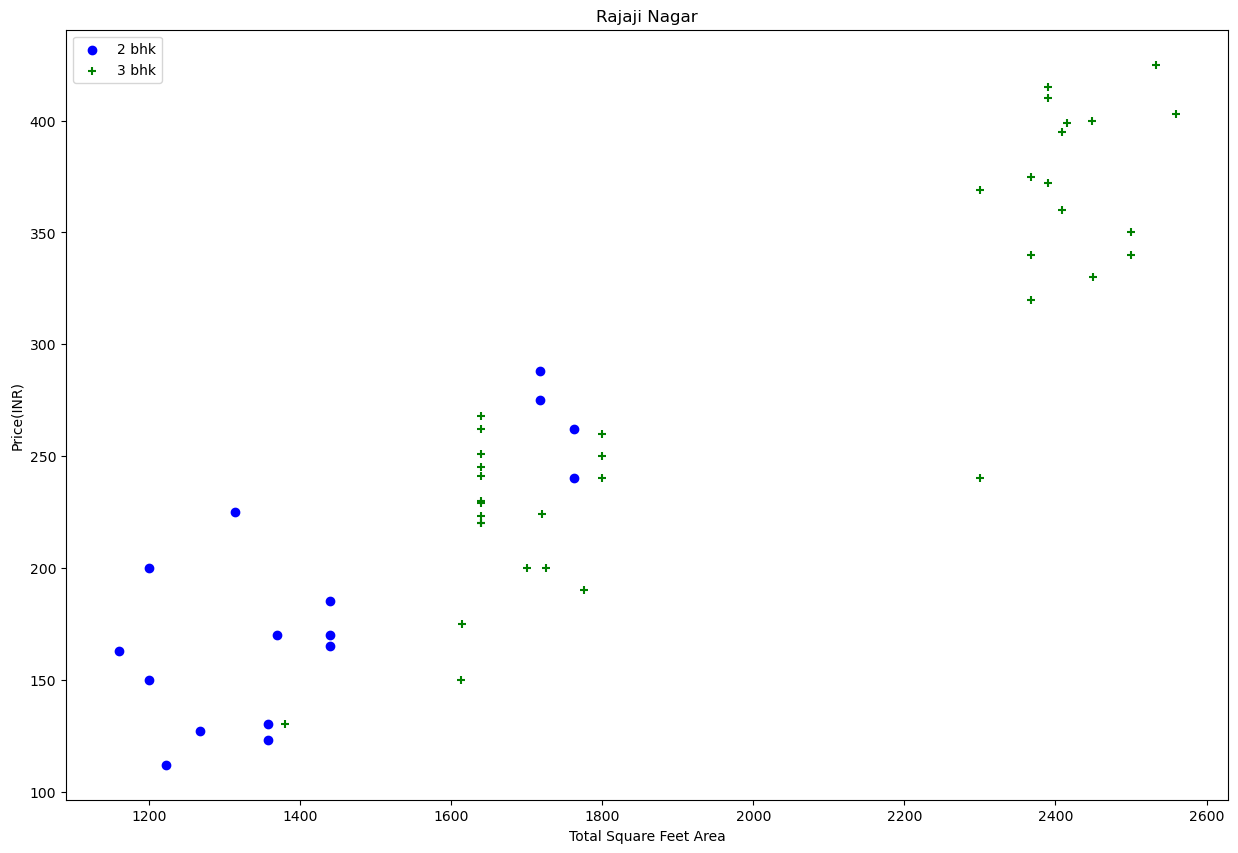

In [47]:
plot_scatter_chart(df7,"Rajaji Nagar")

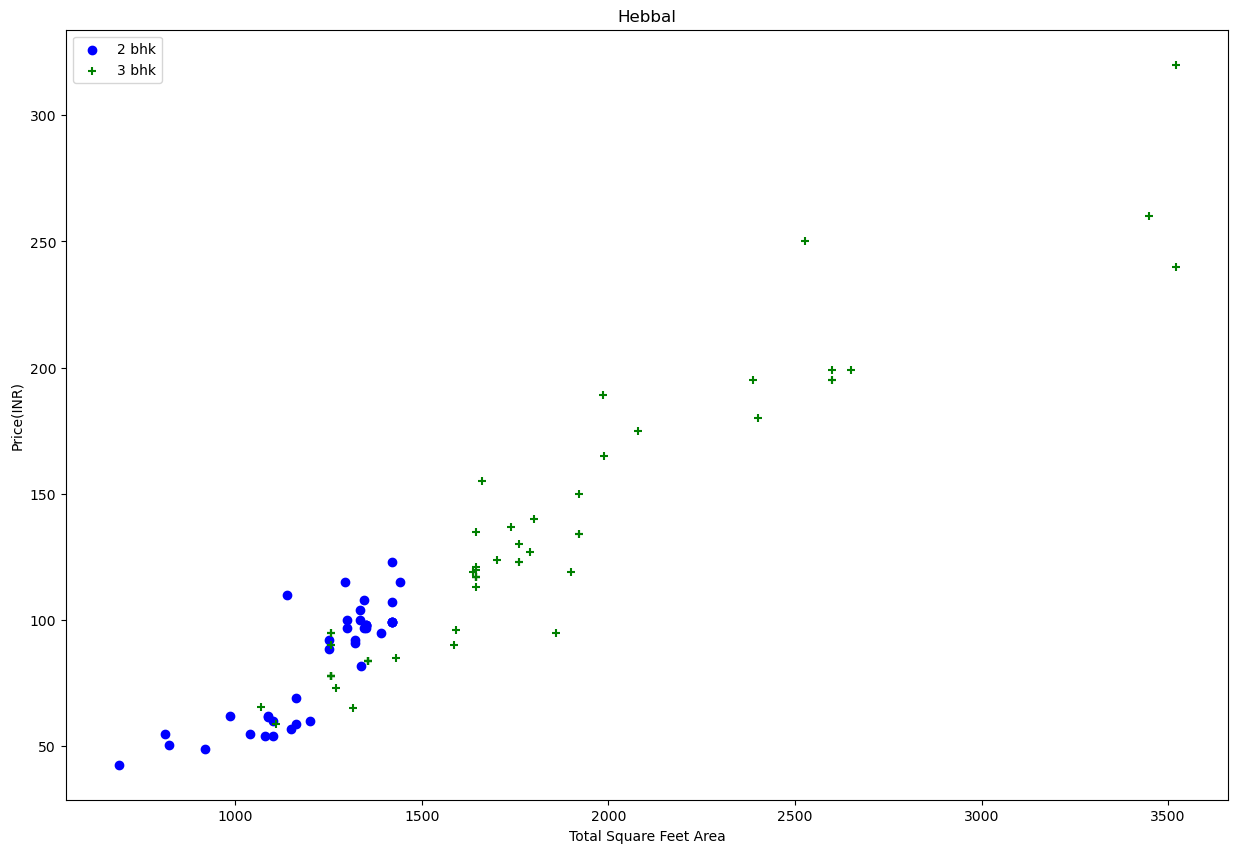

In [48]:
plot_scatter_chart(df7,"Hebbal")

We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location,
we will build a dictionary of stats per bhk, i.e.

In [49]:
{
    '1' : {
        'mean': 4000,
        'std': 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std': 2300,
        'count': 22
    },    
}

{'1': {'mean': 4000, 'std': 2000, 'count': 34},
 '2': {'mean': 4300, 'std': 2300, 'count': 22}}

Now, we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [50]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location,location_df in df.groupby("location"):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby("bhk"):
            bhk_stats[bhk] = {
                "mean": np.mean(bhk_df.price_per_sqft),
                "std": np.std(bhk_df.price_per_sqft),
                "count": bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)

In [51]:
df8.shape

(7063, 9)

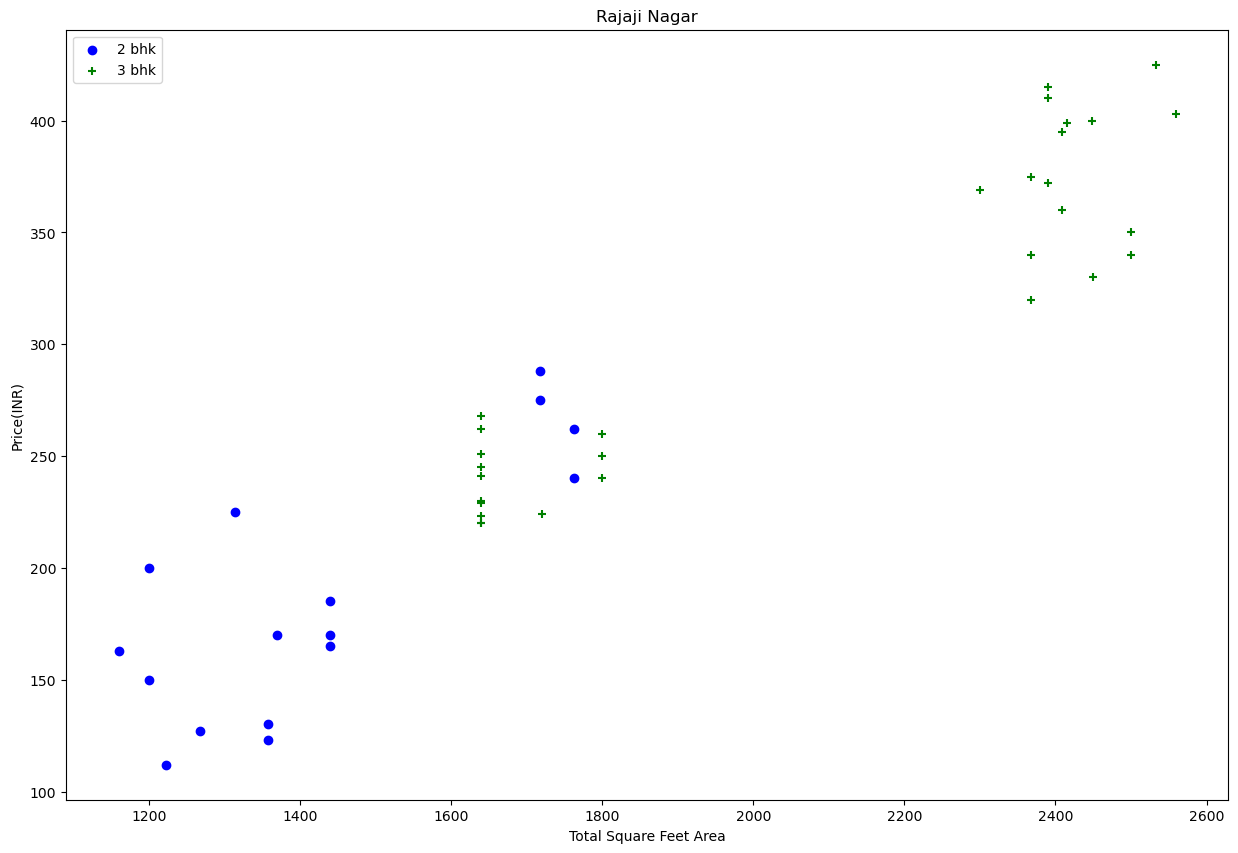

In [52]:
plot_scatter_chart(df8,"Rajaji Nagar")

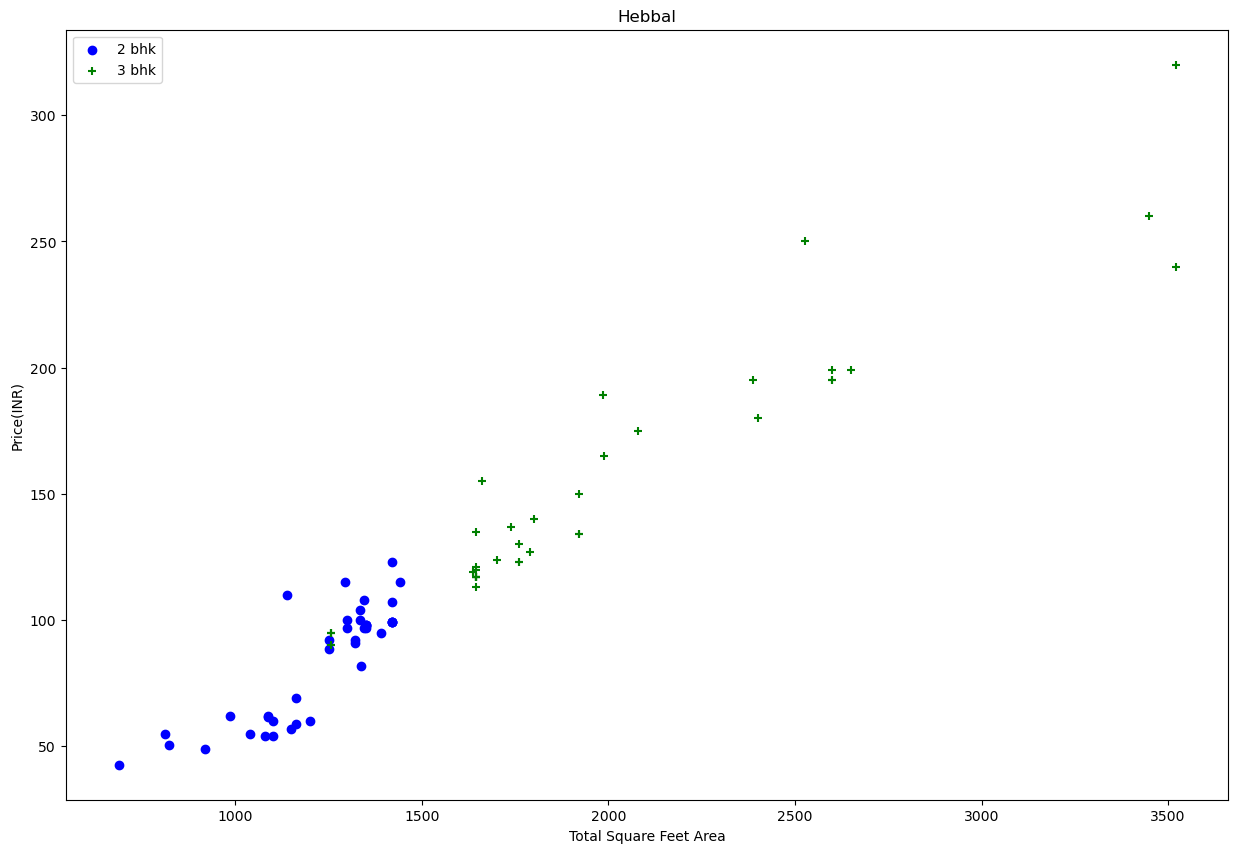

In [53]:
plot_scatter_chart(df8,"Hebbal")

Text(0, 0.5, 'Count')

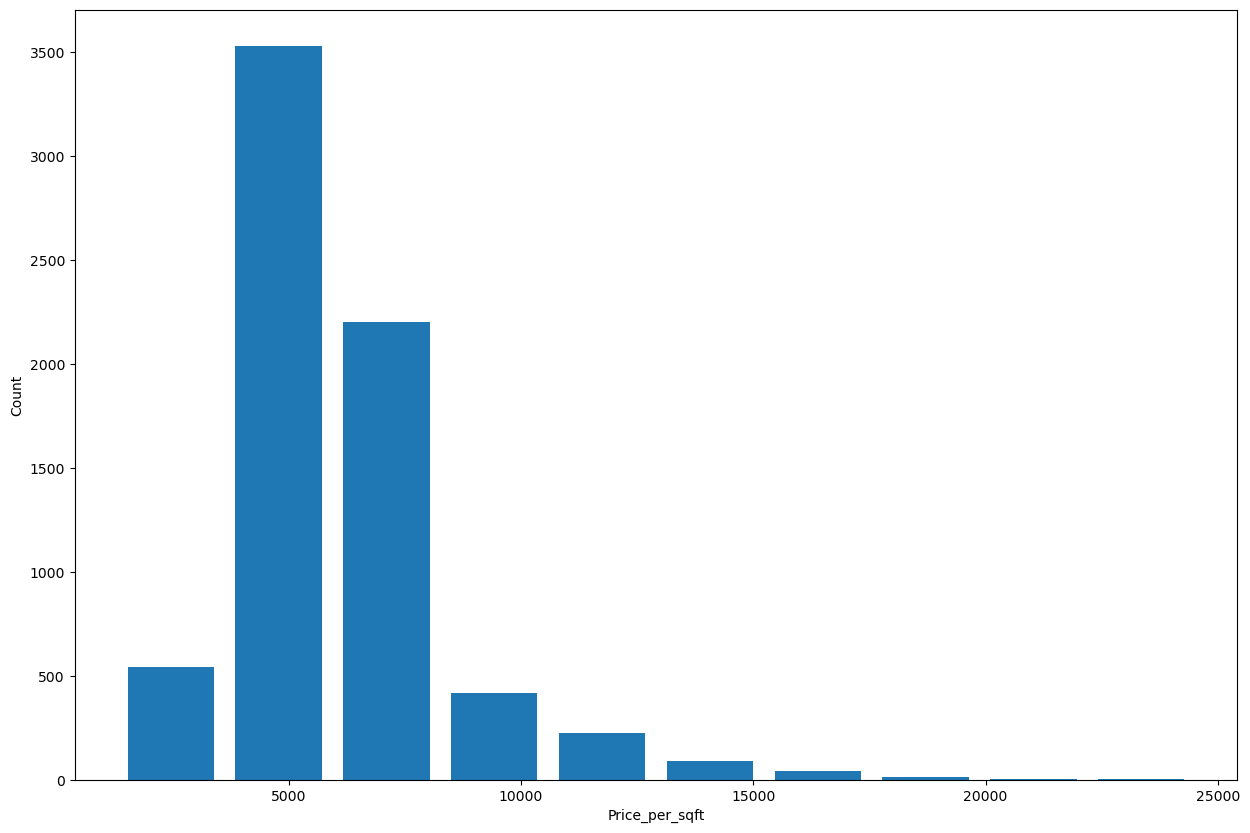

In [54]:
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price_per_sqft")
plt.ylabel("Count")

In [55]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 13.])

Outlier Removal Using Bathrooms Feature

In [56]:
df8[df8.bath>10]

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
9267,Super built-up Area,other,13 BHK,5425.0,13.0,0.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

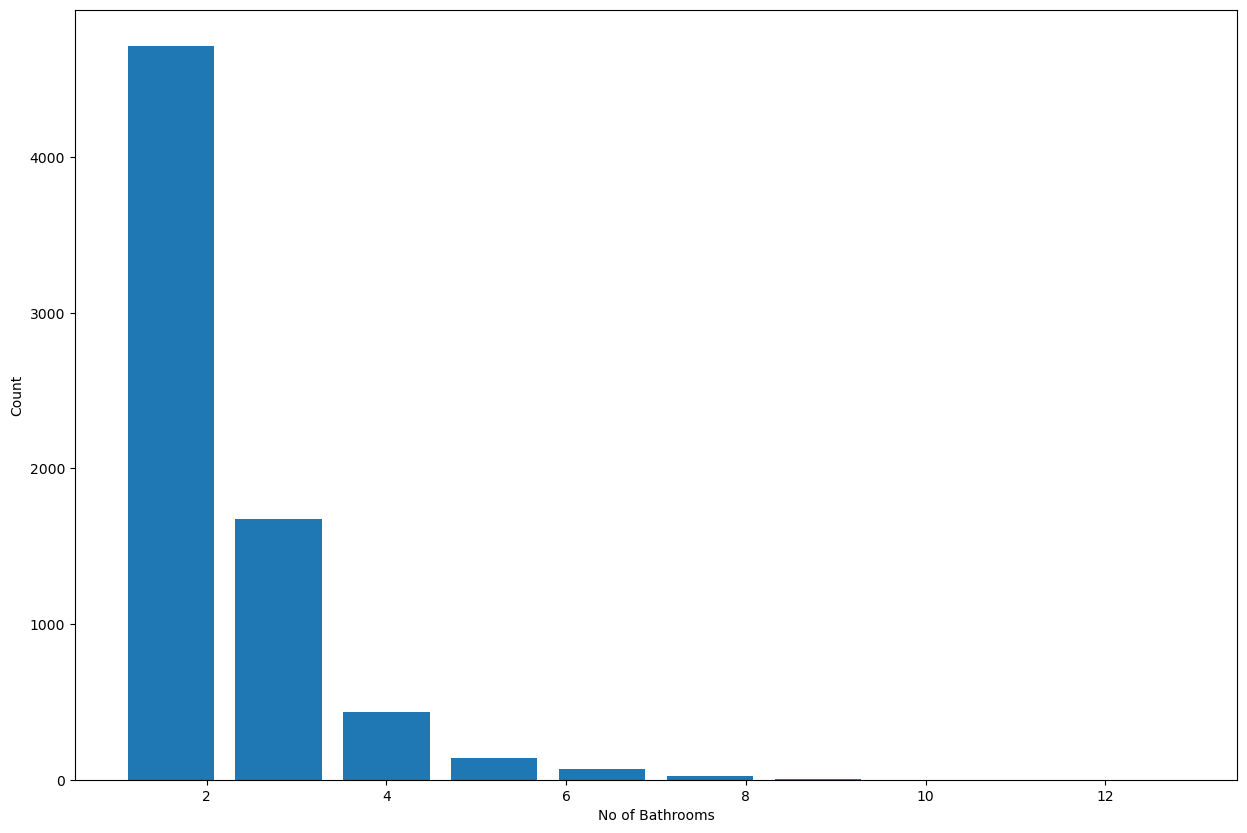

In [57]:
plt.hist(df8.bath,rwidth = 0.8)
plt.xlabel("No of Bathrooms")
plt.ylabel("Count")

In [58]:
df8[df8.bath>df8.bhk+2]

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
1555,Built-up Area,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,80.0,4,3252.032520
6511,Super built-up Area,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,3,6423.034330
8137,Super built-up Area,other,6 BHK,11338.0,9.0,1.0,1000.0,6,8819.897689


It is unusual to have 2 more bathrooms than number of bedrooms in a home

In [59]:
df9 = df8[df8.bath<df8.bath+2]
df9.shape

(7063, 9)

In [60]:
df10 = df9.drop(["size","price_per_sqft"],axis = 1)
df10.head()

,area_type,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,Super built-up Area,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3
3,Built-up Area,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3
4,Super built-up Area,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2


# Encoding For Location

In [61]:
dummies = pd.get_dummies(df10.location)
dummies.head()

,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
df11 = pd.concat([df10,dummies.drop("other",axis = "columns")],axis="columns")
df11.head()

,area_type,location,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Super built-up Area,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Built-up Area,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# Encoding For Area_type

In [63]:
dummies2 = pd.get_dummies(df11.area_type)
dummies2.head()

,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,1,0,0,0
4,0,0,0,1


In [64]:
df12 = pd.concat([df11,dummies2],axis="columns")
df12.head()

,area_type,location,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,...,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Super built-up Area,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Built-up Area,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,Super built-up Area,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [65]:
df13 = df12.drop(["area_type","location","Built-up  Area"], axis = 1)
df13.head()

,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Carpet Area,Plot Area,Super built-up Area
0,2850.0,4.0,1.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1630.0,3.0,2.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1875.0,2.0,3.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1200.0,2.0,0.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Model Building

In [66]:
X = df13.drop("price",axis = "columns")

In [67]:
y = df13.price

In [68]:
X

,total_sqft,bath,balcony,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Carpet Area,Plot Area,Super built-up Area
0,2850.0,4.0,1.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1630.0,3.0,2.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1875.0,2.0,3.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1200.0,2.0,0.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9819,1155.0,2.0,1.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9821,1200.0,2.0,3.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9822,1800.0,1.0,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9825,1353.0,2.0,2.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [69]:
y

0       428.0
1       194.0
2       235.0
3       130.0
4       148.0
        ...  
9819     64.0
9821     70.0
9822    200.0
9825    110.0
9826     26.0
Name: price, Length: 7063, dtype: float64

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

# Model fitting and evaluating model performance

# 1. Linear Regression

In [104]:
from sklearn.linear_model import LinearRegression
lr_reg = LinearRegression()
lr_reg.fit(X_train,y_train)
lr_reg.score(X_test,y_test)

0.860018467420829

 RMSE of Linear Regression model

In [105]:
train_preds = lr_reg.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
print('RMSE on train data: ', rmse)

RMSE on train data:  33.447234202398896


In [106]:
test_preds = lr_reg.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
print('RMSE on test data: ', rmse)

RMSE on test data:  27.288109438149103


MAPE of Linear Regression model

In [107]:
train_MAPE_lr = mape(y_train, train_preds) 

print('MAPE on train data : ', train_MAPE_lr)

MAPE on train data :  0.19326984352903032


In [108]:
#We can also calculate the MAPE mathematically by following approach
np.mean(abs(y_train - train_preds)/y_train)

0.19326984352903082

In [109]:
test_mape_lr = mape(y_test, test_preds)

print('MAPE on test data : ', test_mape_lr) 

MAPE on test data :  0.21547673975067366


In [110]:
np.mean(abs(y_test - test_preds)/y_test)

0.21547673975067375

In [ ]:
# Observations:
# RMSE on train data is slightly higher than on test data
# MAPE on train data is slightly lower than on test data

# Using K Fold cross validation to measure accuracy of our LinearRegression model..

In [72]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,y,cv= cv)

array([0.88078617, 0.80597013, 0.80402669, 0.79411008, 0.88980827])

# Testing the model for few properties 

In [73]:
df13.head()

,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Carpet Area,Plot Area,Super built-up Area
0,2850.0,4.0,1.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1630.0,3.0,2.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1875.0,2.0,3.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1200.0,2.0,0.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [74]:
X.columns

Index(['total_sqft', 'bath', 'balcony', 'bhk', '1st Block Jayanagar',
       '1st Block Koramangala', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Phase JP Nagar',
       ...
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur', 'Carpet  Area',
       'Plot  Area', 'Super built-up  Area'],
      dtype='object', length=254)

In [75]:
def predict_price(location,area,sqft,bath,balcony,bhk):
    loc_index = np.where(X.columns== location)[0][0]
    area_index = np.where(X.columns== area)[0][0]
    
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=balcony
    x[3]=bhk
    if loc_index >0:
        x[loc_index]=1
    if area_index>0:
        x[area_index]=1
    
    return lr_clf.predict([x])[0]

In [76]:
np.where(X.columns== "Super built-up  Area")

(array([253], dtype=int64),)

In [77]:
predict_price('1st Block Koramangala','Plot  Area',2000, 1, 4, 3)

234.13266233041077

In [78]:
predict_price('1st Phase JP Nagar','Carpet  Area',1000, 3, 3,2)

87.673361502944

In [79]:
predict_price('1st Phase JP Nagar','Super built-up  Area',1000, 2, 2, 3)

82.4561812238212

In [80]:
predict_price('Indira Nagar','Carpet  Area',1000, 3, 3,4)

160.9031840254197

# 2. KNN Regressor

In [81]:
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

KNeighborsRegressor()

A) RMSE of KNN Regressor model

In [82]:
train_preds = knn_reg.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
print('RMSE on train data : ', rmse)

RMSE on train data :  42.73348056448091


In [83]:
test_preds = knn_reg.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
print('RMSE on test data: ', rmse)

RMSE on test data:  40.679589474752504


MAPE of KNN Regressor Model

In [84]:
train_MAPE_knn = mape(y_train, train_preds) 

print('MAPE on train data : ', train_MAPE_knn) 

MAPE on train data :  0.18891583571856008


In [85]:
#We can also calculate the MAPE mathematically by following approach
np.mean(abs(y_train - train_preds)/y_train)

0.18891583571856016

In [86]:
test_mape_knn = mape(y_test, test_preds)

print('MAPE on test data : ', test_mape_knn) 

MAPE on test data :  0.23923718136079852


In [87]:
#We can also calculate the MAPE mathematically by following approach
np.mean(abs(y_test - test_preds)/y_test)

0.23923718136079866

In [ ]:
# Observations:
# RMSE on train data is slightly higher than on test data
# MAPE on train data is slightly lower than on test data

# 3. Decision Tree Regressor 

In [99]:
#Instatiating decision tree regressor with splitting criteria as least square error and maximum depth of 3
dtr_reg = DecisionTreeRegressor(criterion = 'mse',max_depth = 3, random_state = 40)

In [100]:
model_dtr = dtr_reg.fit(X_train,y_train) 

RMSE of Decision Tree Regressor model

MAPE of Decision Tree Regressor model

In [95]:
train_MAPE_dtr = mape(y_train, train_preds) 

print('MAPE on train data : ', train_MAPE_dtr) 

MAPE on train data :  0.2880485339879589


In [96]:
np.mean(abs(y_train - train_preds)/y_train)

0.2880485339879564

In [97]:
test_MAPE_dtr = mape(y_test, test_preds)

print('MAPE on test data : ', test_MAPE_dtr)

MAPE on test data :  0.2990640092019014


In [98]:
np.mean(abs(y_test - test_preds )/y_test)

0.2990640092019011

In [ ]:
# Observations:

# MAPE on train data is slightly lower than on test data

In [ ]:
# Based on MAPE, it is recommended to use KNN regressor model to predict the House price.
# MAPE of KNN regressor model is lower than other two models and, 
# also train and test MAPE in KNN regressor model is consistent.

In [ ]:
#What is a good MAPE for forecasting?

# A MAPE less than 5% is considered as an indication that the forecast is acceptably accurate. 
# A MAPE greater than 10% but less than 25% indicates low, but acceptable accuracy and 
# MAPE greater than 25% very low accuracy, so low
# that the forecast is not acceptable in terms of its accuracy.